#### Exercise 1 Wine Dataset

#### Wine dataset
http://archive.ics.uci.edu/ml/datasets/Wine
Data Set Information:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.


1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10) Color intensity
11) Hue
12) OD280/OD315 of diluted wines
13) Proline

NOTE: 1st attribute is class identifier (1-3)

#### Important Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
import openml


#sklearn
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix, ConfusionMatrixDisplay


#### Loading the Data

In [4]:
cols = ['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
        'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names=cols)

In [5]:
df_wine.head(5)

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Preprocessing data

In [6]:
# Number of samples and number of attributes
num_samples = df_wine.shape[0]
num_attributes = df_wine.shape[1] - 1 # first one is the class annotation
print("The number of samples is: ", str(num_samples))
print("The number of attributes is: ", str(num_attributes))

The number of samples is:  178
The number of attributes is:  13


In [7]:
#Counting the number of samples for each class
wine = df_wine.to_numpy()
num_class_1 = sum(wine[:, 0] == 1)
num_class_2 = sum(wine[:, 0] == 2)
num_class_3 = sum(wine[:, 0] == 3)

print("Number of samples that belong to class 1: ", str(num_class_1))
print("Number of samples that belong to class 2: ", str(num_class_2))
print("Number of samples that belong to class 3: ", str(num_class_3))

Number of samples that belong to class 1:  59
Number of samples that belong to class 2:  71
Number of samples that belong to class 3:  48


In [8]:
df_wine.dtypes

class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

All the variables contain numeric type attributes

#### Exploratory Data Analysis

In [14]:
df_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


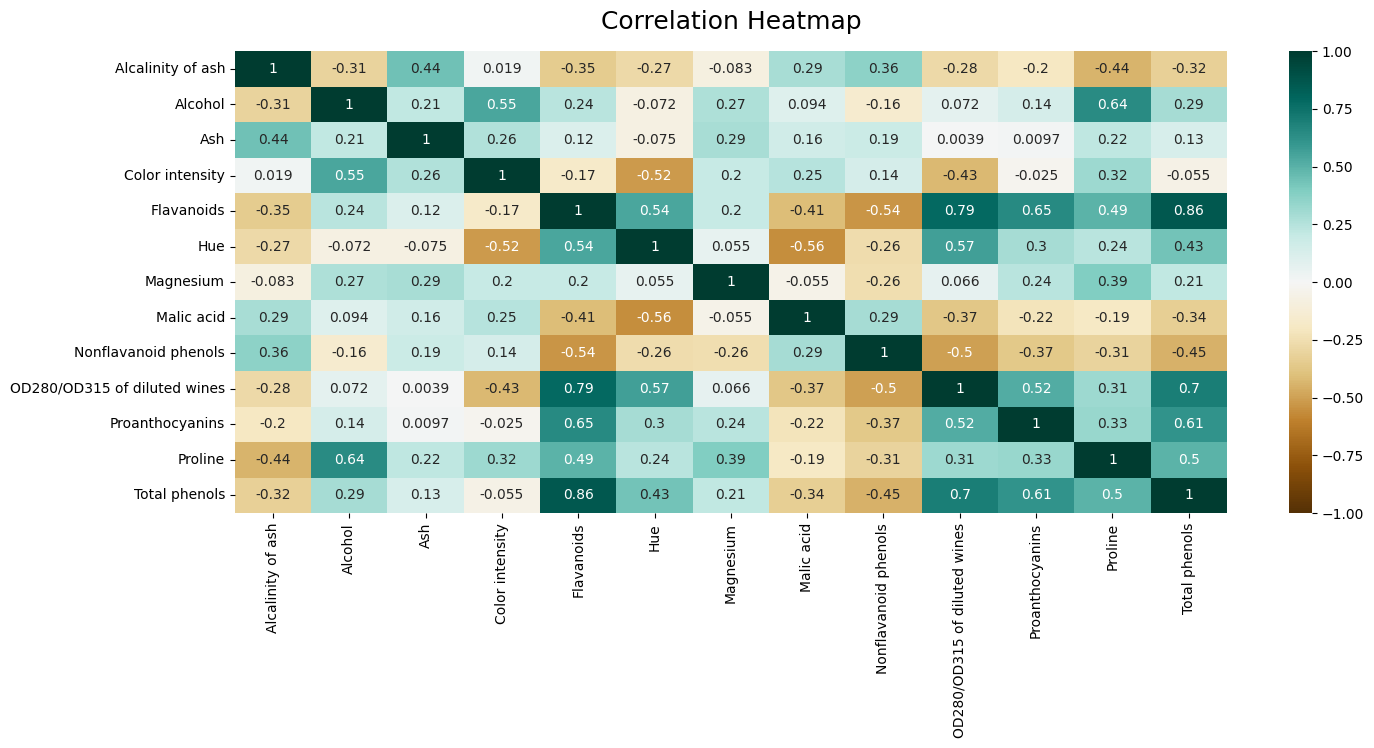

In [21]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_wine[df_wine.columns.difference(['class'])].corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
# plt.savefig('bank_heatmap.jpg',)
plt.show()

Observations:
- The heatmap above shows that the variables are highly correlated with each-other
- The most noteworthy correlation, with a coefficient of 0.86 exists between `Total Phenols` and
`Flavonoids`
- `Flavanoids & OD280/OD315 of diluted wines`-> 0.79
- `Alcohol` and `Proline`-> 0.64
- `Flavanoids` and  `Nonflavanoid phenols`-> -0.54 ,etc.

In [43]:
# sns.scatterplot( data = df_wine, x= 'Flavanoids',y = 'Alcohol')

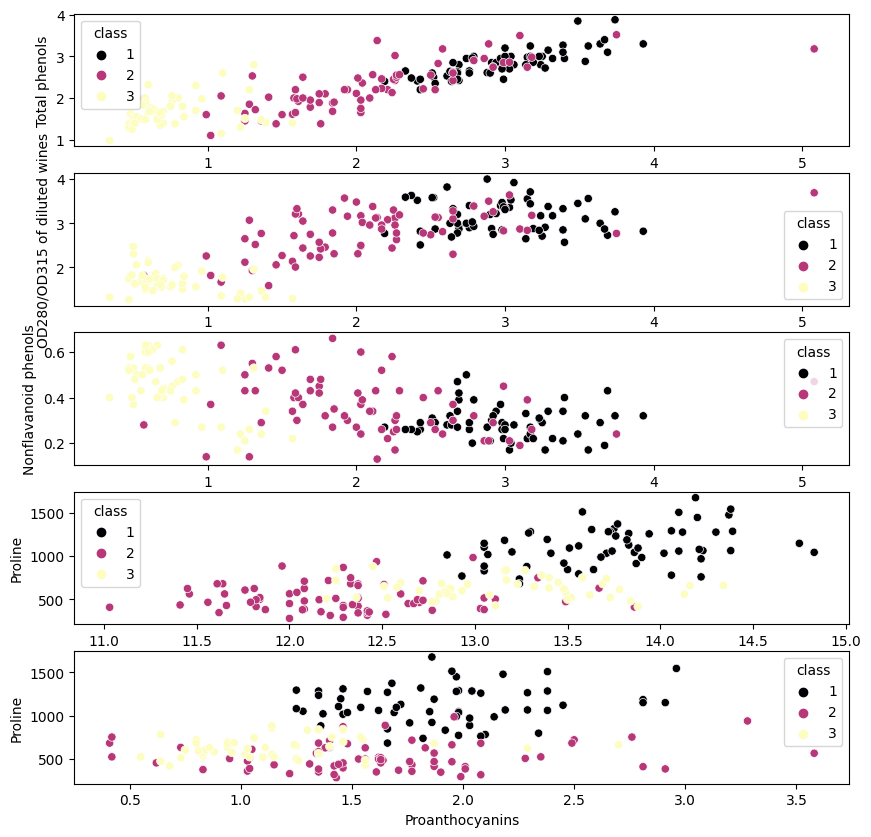

In [58]:
fig, axes = plt.subplots(5, figsize = (10, 10)) 
axes = axes.flatten()
sns.scatterplot(ax = axes[0],
                x = "Flavanoids",
                y = "Total phenols",
                hue = "class",
                palette = "magma",
                data = df_wine)

sns.scatterplot(ax = axes[1],
                x = "Flavanoids",
                y = "OD280/OD315 of diluted wines",
                hue = "class",
                palette = "magma",
                data = df_wine)

sns.scatterplot(ax = axes[2],
                x = "Flavanoids",
                y = "Nonflavanoid phenols",
                hue = "class",
                palette = "magma",
                data = df_wine)


sns.scatterplot(ax = axes[3],
                x = "Alcohol",
                y = "Proline",
                hue = "class",
                palette = "magma",
                data = df_wine)



sns.scatterplot(ax = axes[4],
                x = "Proanthocyanins",
                y = "Proline",
                hue = "class",
                palette = "magma",
                data = df_wine)
plt.show()


Observations:

- As can be seen above, usually  there is clear separation between our classes. Especially `class 3`can be clearly distinguished from the rest of the classes in most cases. Howevers, some overlaps surely occur.

In [23]:
def creating_box_hist(column, df):
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_dis) = plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.20, .80)},figsize=(8, 5))  
    mean=df[column].mean()
    median=df[column].median()
    mode=df[column].mode().tolist()[0]

    f.suptitle("Data distribution of  "+ column  , fontsize=10, fontweight='bold')
    # assigning a graph to each ax

    sns.boxplot(df[column], ax=ax_box,orient = 'h',showmeans = True)

    sns.despine(top=True,right=True,left=True)
    sns.histplot(df[column],kde=False,ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

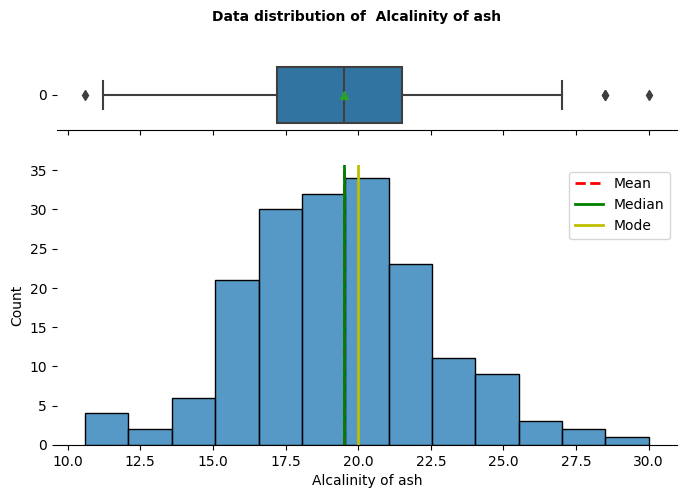

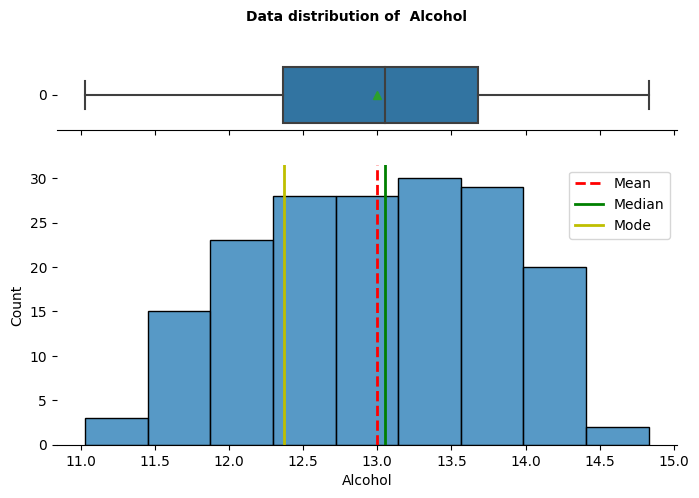

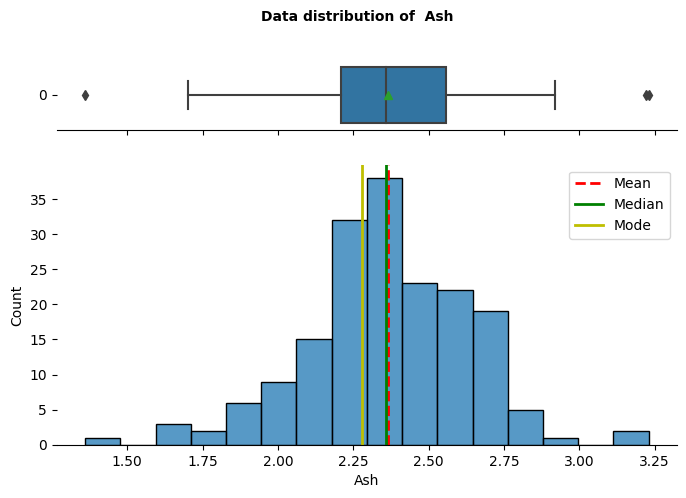

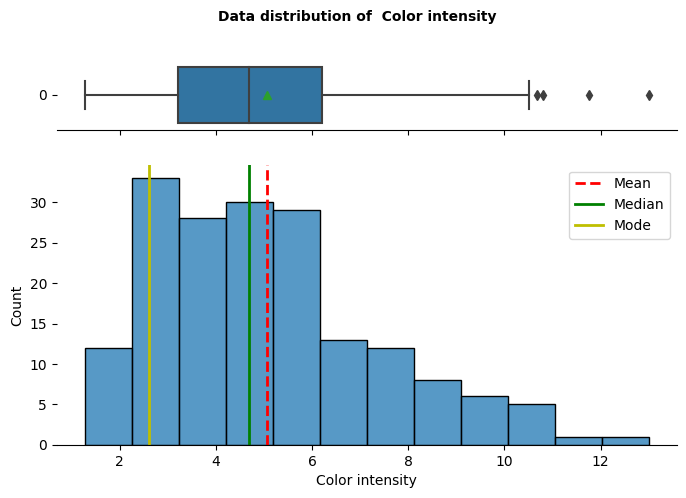

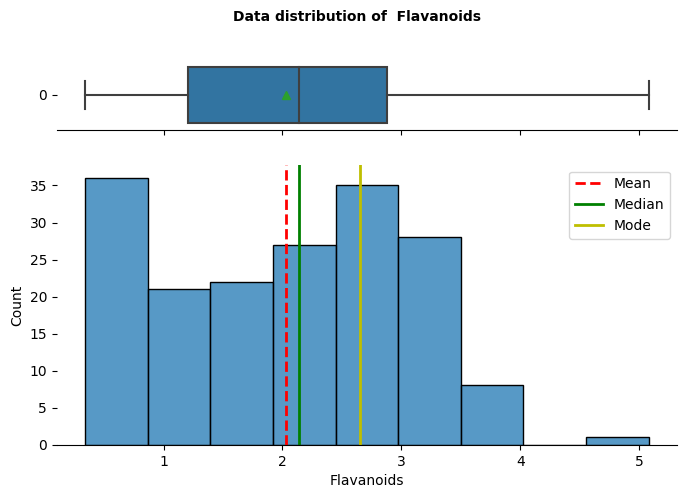

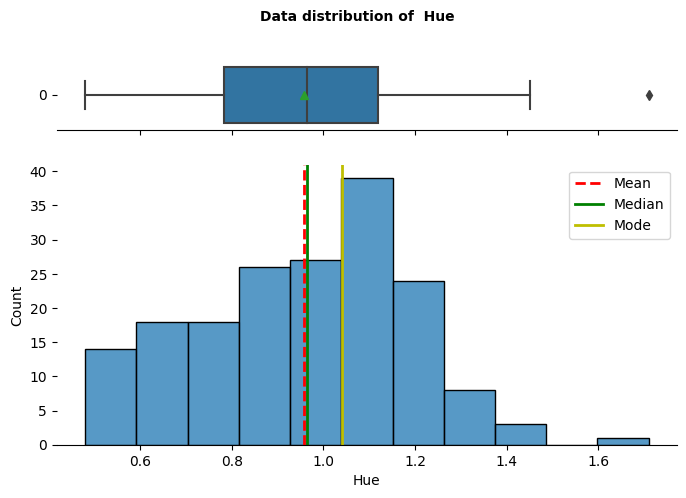

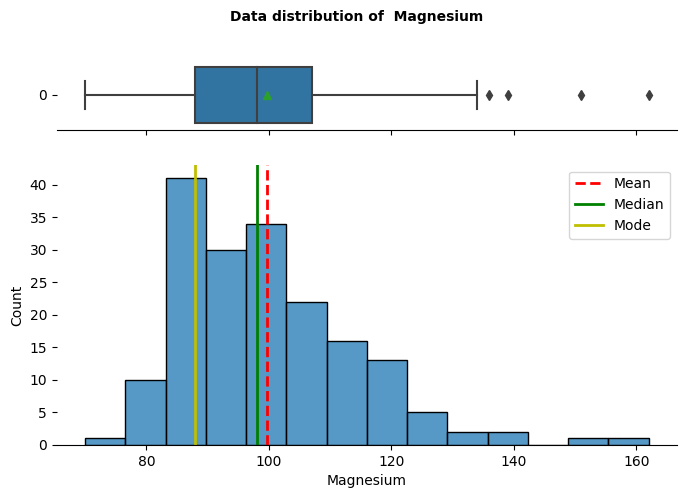

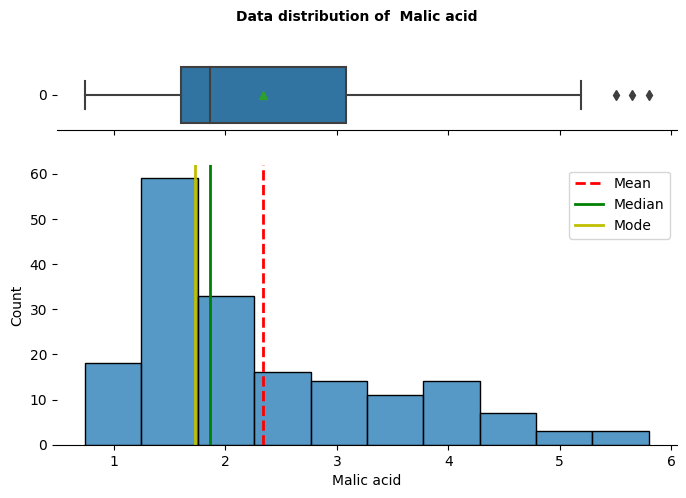

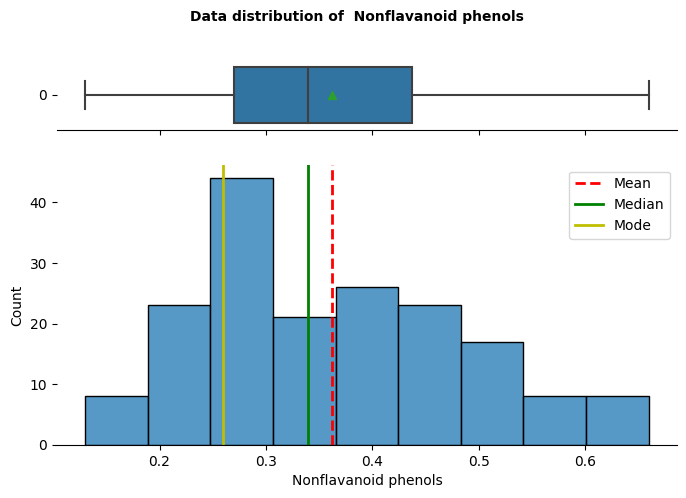

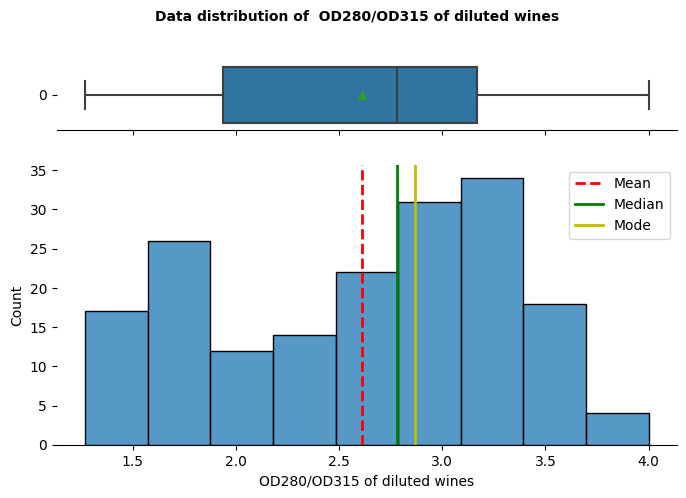

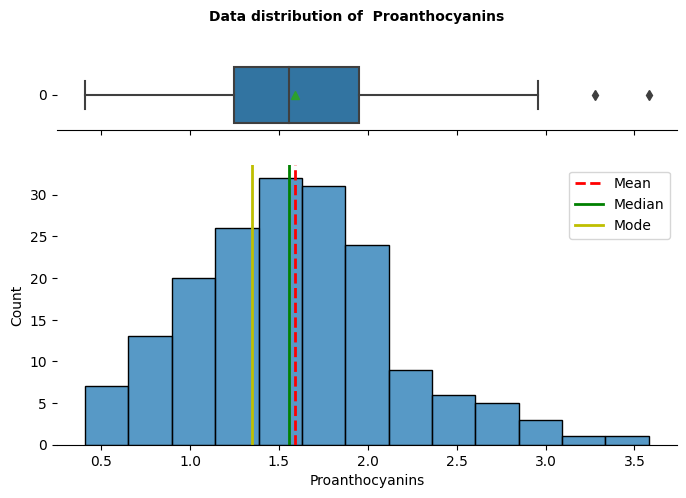

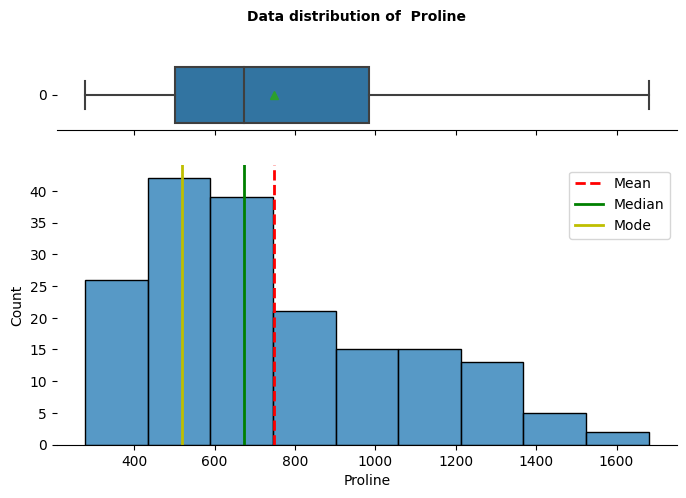

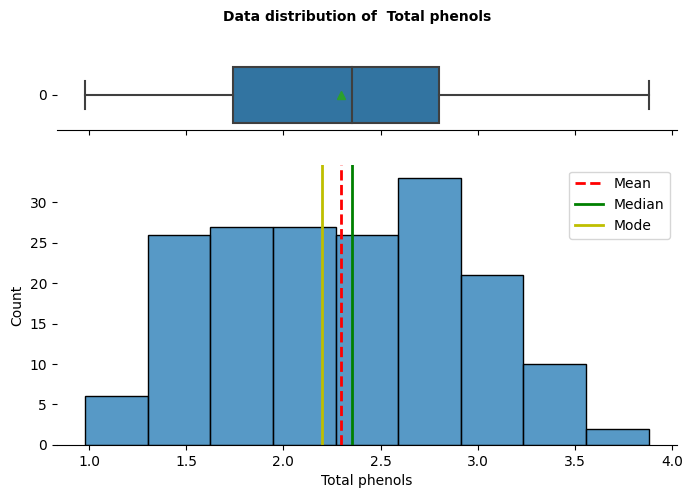

In [26]:
# Plots of numeric columns
for i in df_wine[df_wine.columns.difference(['class'])]:
    creating_box_hist(i,df_wine)

Observations:
- Normal distibuted variables: `Alcalinity of ash`,

- Right-skewed variables: `Alcohol`, `Ash`,  `Color intensity`, `Magnesium`, `Malic Acid`, `Nonflavanoid phenols`, `Proanthocyanins`, `Proline`, `Total Phenols`,

- Left-skewed variables: ` Flavanoids`, `Hue`, `OD280/OD315 of diluted wines`

- As shown through the boxplots, there are no outliers in the data